In [2]:
import tensorflow
#from moviepy.editor import *
#import moviepy.editor as mpy 
from moviepy.editor import VideoFileClip, CompositeVideoClip, clips_array, ImageClip
import numpy as np
import PIL.Image
from cStringIO import StringIO
import IPython.display

In [4]:
content1 = VideoFileClip("../../data/backflip.mp4").subclip(2*60+13,2*60+17).resize(width=480, height=320)
content2 = VideoFileClip("../../data/jet.mp4").subclip(2*60+1,2*60+7).resize(width=480, height=320)
#content2.ipython_display()

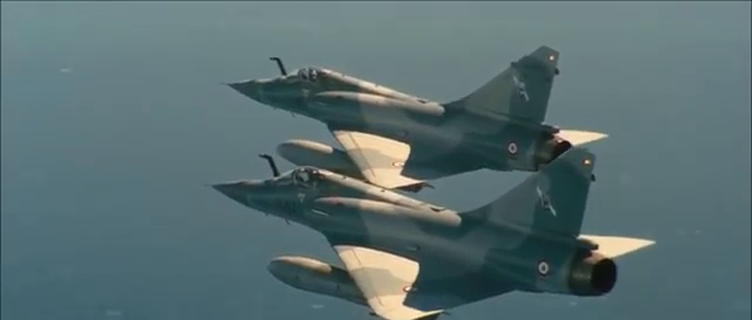

In [5]:
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))


for frame in content2.iter_frames():
    showarray(frame)
    break

In [7]:
class ArtClip (CompositeVideoClip, object):
    def __init__(self, clips, size=None, bg_color=None, use_bgclip=False,
                 ismask=False):
        
        super(ArtClip, self).__init__(clips, size=size, bg_color=bg_color, use_bgclip=use_bgclip, ismask=ismask)
        def make_frame(t):
            f = self.bg.get_frame(t)
            for c in self.playing_clips(t):
                if c.mask is not None:
                    weight_c = c.mask.get_frame(t-c.start) # offset by c.start (look at ct in blit_on())
                f = c.blit_on(f, t)
            return f
        
        def make_art_frame(t):
            f = self.bg.get_frame(t)
            if len(self.playing_clips(t))>1:
                import style_transfer as rm
                image = rm.transfer_runner()
                c = ImageClip(image)
                f = c.blit_on(f,t)
            return f
        
        def debug_frame(t):
            f = self.bg.get_frame(t)
            #print("t is {}, # Playing is {}".format(t,len(self.playing_clips(t))))
            num_clips = len(self.playing_clips(t))
            clip = clips_array([[c.resize(width=480/num_clips) for c in self.playing_clips(t)]], cols_widths=[480/num_clips for x in xrange(num_clips)])#.resize(width = 480*2)
            for c in self.playing_clips(t):
                print c.size
            print clip.size
            
            f = clip.blit_on(f,t)
                
            return f
        
        self.make_frame = make_art_frame
        
style = ImageClip("images/the_scream.jpg")
content = CompositeVideoClip([content1, content2.crossfadein(.5).set_start(.5)])
ArtClip([style, content]).set_end(2.0/24).ipython_display(fps=24)

  0%|          | 0/3 [00:00<?, ?it/s]

AttributeError: 'module' object has no attribute 'transfer_runner'